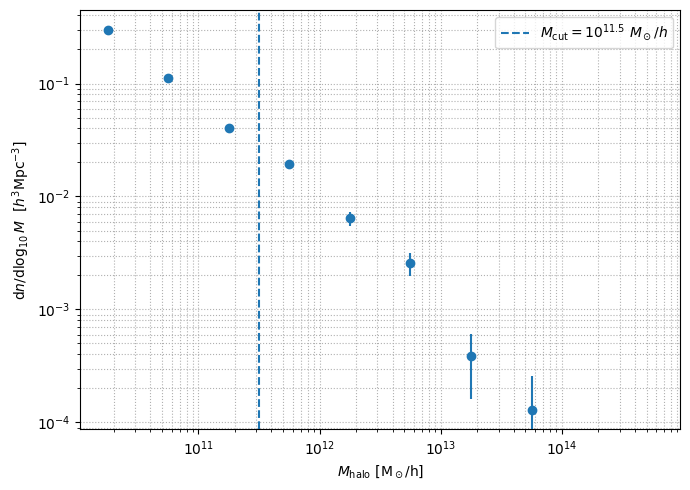

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

def load_halo_masses_camels(h5_file):
    """
    Load FoF halo masses from CAMELS group catalog (Group/GroupMass),
    converting to Msun/h.
    """
    with h5py.File(h5_file, "r") as f:
        # GroupMass is in units of 1e10 Msun/h
        masses = f['Group/GroupMass'][:] * 1e10  # now in Msun/h
    masses = masses[masses > 0]
    return masses

def compute_halo_mass_function(masses, boxsize, logM_min=10.0, logM_max=15.0, dlogM=0.5):
    volume = boxsize**3  # (Mpc/h)^3
    logM = np.log10(masses)

    bins = np.arange(logM_min, logM_max + dlogM, dlogM)
    hist, edges = np.histogram(logM, bins=bins)

    logM_centers = 0.5 * (edges[:-1] + edges[1:])
    dlogM = edges[1] - edges[0]

    dndlogM = hist / (volume * dlogM)
    dndlogM_error = np.sqrt(hist) / (volume * dlogM)
    return logM_centers, dndlogM,dndlogM_error
    
def plot_halo_mass_function(logM_centers, dndlogM,dndlogM_error, label=None, mass_cut_log10=None):
    M_centers = 10**logM_centers  # Msun/h

    plt.figure(figsize=(7,5))
    plt.errorbar(M_centers, dndlogM, yerr= dndlogM_error, fmt='o', label=label)
    plt.loglog()
    if mass_cut_log10 is not None:
        M_cut = 10**mass_cut_log10
        plt.axvline(M_cut, linestyle='--', label=rf"$M_{{\rm cut}}=10^{{{mass_cut_log10}}}\ M_\odot/h$")

    plt.xlabel(r"$M_{\rm halo}\ \mathrm{[M_\odot/h]}$")
    plt.ylabel(r"$\mathrm{d}n/\mathrm{d}\log_{10}M\ \ [h^3\mathrm{Mpc}^{-3}]$")
    if label is not None or mass_cut_log10 is not None:
        plt.legend()
    plt.grid(True, which="both", ls=":")
    plt.tight_layout()
    plt.show()



halo_file = "groups_090_1P_0.hdf5"  # your example
Lbox = 25.0  # Mpc/h for CAMELS

masses = load_halo_masses_camels(halo_file)
logM_centers, dndlogM,dndlogM_error = compute_halo_mass_function(masses, boxsize=Lbox)

plot_halo_mass_function(logM_centers, dndlogM,dndlogM_error, mass_cut_log10=11.5)
    